<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Session3/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


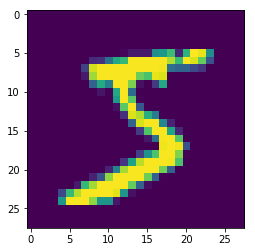

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(24, 1, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 11, 11, 24)        792       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 9, 9, 16)          3472      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 7, 7, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=1000, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0100 - acc: 0.9969
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0050 - acc: 0.9987
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0040 - acc: 0.9991
Epoch 4/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0034 - acc: 0.9993
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0030 - acc: 0.9994
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0026 - acc: 0.9995
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0023 - acc: 0.9995
Epoch 8/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0021 - acc: 0.9996
Epoch 9/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0019 - acc: 0.9996
Epoch 10/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0017 - acc: 0.9997

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [50]:
print(score)

[0.03221313219048966, 0.9935]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.1440498e-19 3.9596858e-20 1.4203293e-12 1.1791239e-08 7.8847133e-23
  2.7925111e-19 7.0597057e-29 1.0000000e+00 9.3665559e-13 7.3187983e-11]
 [1.3908963e-15 3.0146143e-11 1.0000000e+00 3.9519715e-14 2.3293408e-29
  8.5822015e-19 4.3475348e-10 5.8178566e-32 3.0046512e-17 3.9382399e-25]
 [4.5519482e-08 9.9999928e-01 1.8061361e-07 1.2889720e-10 3.2512094e-07
  3.9917189e-10 2.8979938e-09 4.9574808e-08 1.7845085e-07 1.2438200e-10]
 [1.0000000e+00 1.3000663e-18 4.0530049e-10 9.5614003e-19 7.1813664e-21
  4.7329079e-13 1.4919843e-10 4.7233237e-12 1.4300065e-12 4.3506031e-14]
 [4.7070261e-16 1.3895167e-16 1.5987903e-12 2.1388107e-15 9.9999988e-01
  2.4489484e-18 7.5393587e-16 7.2259747e-11 1.3479153e-11 7.0328070e-08]
 [4.8833604e-09 9.9986255e-01 1.2829527e-08 3.2431424e-10 4.6907900e-07
  2.2661250e-11 4.9813459e-10 1.2798673e-04 8.9790710e-06 2.7462330e-09]
 [1.4938119e-20 6.6183647e-10 9.8716754e-08 1.0093489e-10 9.1642451e-01
  3.3800532e-06 1.5967242e-14 2.3984137e-05 8.3537802e-02 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

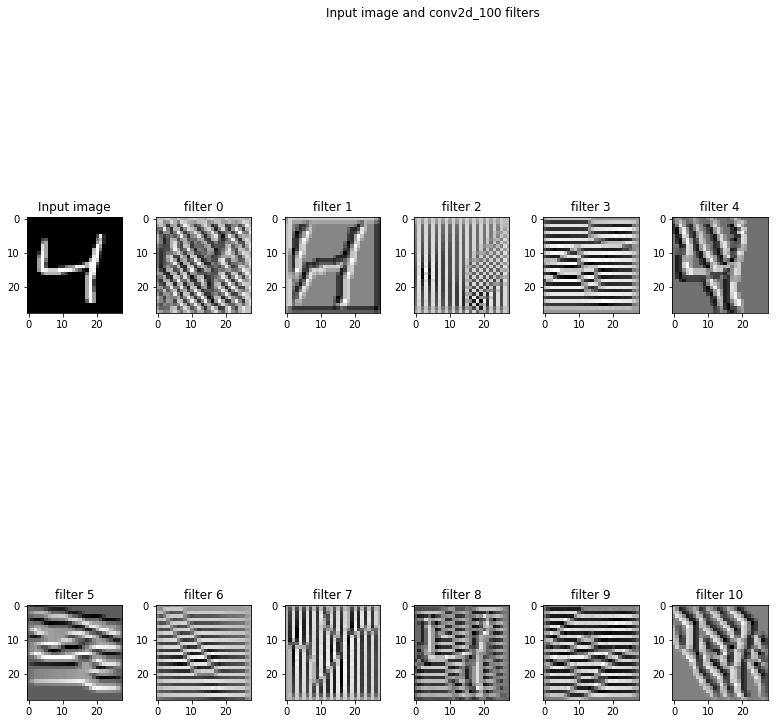

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_100'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()